# DATASET 3 – Lumpy Skin Disease Dataset

# 1. Data Understanding & Problem Framing

In [ ]:
Datasource: Kaggle
Real-world context:Lumpy Skin Disease is a viral disease affecting cattle and is influenced by environmental and climatic factors.
This dataset likely represents spatial-temporal environmental conditions associated with disease presence.

In [ ]:
Problem Statement:Predict whether Lumpy Skin Disease is present (lumpy) based on environmental, geographic, and climatic features.
lumpy (Binary: 0 = No Disease, 1 = Disease)
This is a Supervised Machine Learning – Binary Classification Problem.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("C:/Users/sneha/Downloads/data/Lumpy skin disease data.csv")

In [5]:
df.head(5)

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24803 non-null  float64
 1   y                    24803 non-null  float64
 2   region               3039 non-null   object 
 3   country              3039 non-null   object 
 4   reportingDate        3039 non-null   object 
 5   cld                  24803 non-null  float64
 6   dtr                  24803 non-null  float64
 7   frs                  24803 non-null  float64
 8   pet                  24803 non-null  float64
 9   pre                  24803 non-null  float64
 10  tmn                  24803 non-null  float64
 11  tmp                  24803 non-null  float64
 12  tmx                  24803 non-null  float64
 13  vap                  24803 non-null  float64
 14  wet                  24803 non-null  float64
 15  elevation            24803 non-null 

In [9]:
df.shape

(24803, 20)

In [11]:
df.describe()

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
count,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000
mean,79.221374,46.370056,59.452159,9.107777,23.978048,0.803487,26.271137,-15.794755,-11.227807,-6.681212,3.728230,8.542482,164.769302,4.416119,629.129412,170.306057,0.122526
std,43.338530,19.220555,19.423029,2.988448,11.518315,1.172915,33.630747,17.587685,17.989715,18.540915,4.952353,6.205199,19.679197,2.406231,2279.198775,1127.977653,0.327898
min,-179.750000,-28.750000,0.000000,2.000000,0.000000,0.000000,0.000000,-52.100000,-48.100000,-44.200000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,45.083150,34.750000,43.800000,6.800000,23.210000,0.000000,5.900000,-30.100000,-25.500000,-20.900000,0.400000,3.000000,152.000000,3.000000,2.513366,0.000000,0.000000
50%,80.750000,48.250000,62.300000,8.300000,31.000000,0.200000,14.700000,-19.100000,-14.200000,-9.700000,1.500000,8.020000,161.000000,4.000000,43.383823,0.000197,0.000000
75%,109.750000,61.750000,75.300000,11.100000,31.000000,1.100000,33.400000,-2.200000,1.400000,4.900000,4.800000,12.710000,176.000000,4.000000,386.124908,0.002094,0.000000
max,179.750000,81.750000,98.700000,20.600000,31.000000,7.500000,341.900000,23.900000,28.500000,36.400000,28.600000,30.920000,249.000000,11.000000,167388.672700,56654.780150,1.000000


In [13]:
df.columns

Index(['x', 'y', 'region', 'country', 'reportingDate', 'cld', 'dtr', 'frs',
       'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet', 'elevation',
       'dominant_land_cover', 'X5_Ct_2010_Da', 'X5_Bf_2010_Da', 'lumpy'],
      dtype='object')

In [ ]:
The dataset contains 24803 rows and 20 columns.
The target variable is “lumpy”(Represents disease occurrence,All other features act as predictors)

In [ ]:
Numerical features:
continuous:x,y,cld,	dtr,frs,pet	,pre,tmn,tmp,tmx,vap,wet,X5_Ct_2010_Da,	X5_Bf_2010_Da
Discrete: elevation,	dominant_land_cover
Categorical:region, country
Date time: reportingDate

# 2. DATA PREPROCESSING

In [15]:
#Missing check
df.isnull().sum()

x                          0
y                          0
region                 21764
country                21764
reportingDate          21764
cld                        0
dtr                        0
frs                        0
pet                        0
pre                        0
tmn                        0
tmp                        0
tmx                        0
vap                        0
wet                        0
elevation                  0
dominant_land_cover        0
X5_Ct_2010_Da              0
X5_Bf_2010_Da              0
lumpy                      0
dtype: int64

In [ ]:
Columns affected:region, country, reportingDate
These have ~21,764 missing out of 24,803 rows
→ ~87% missing values
Decided to remove : Very high missing percentage (>80%), 
Imputing would introduce noise
Model-based imputation not meaningful for geographic labels

In [21]:
df.drop(['region', 'country', 'reportingDate'], axis=1, inplace=True)

In [17]:
# duplicate check
df.duplicated().sum()

608

In [ ]:
Duplicates can:
Bias model
Inflate importance of repeated samples
Cause overfitting
Decided to Remove :Large dataset → removing 608 rows (~2.4%) safe, Prevents data leakage

In [19]:
df['lumpy'].value_counts()

lumpy
0    21764
1     3039
Name: count, dtype: int64

In [ ]:
# OUTLIER TREATMENT
Climate and environmental variables (like pre, vap, frs) are usually skewed, not normally distributed.
Z-score assumes normal distribution ❌
IQR does NOT assume normality ✅
👉 Since this dataset contains environmental & climatic measures, IQR is more appropriate.
IQR performs reliably and efficiently for large datasets without strong assumptions.

In [23]:
import numpy as np

num_cols = df.select_dtypes(include=np.number).columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5*IQR)) |
            (df[num_cols] > (Q3 + 1.5*IQR))).sum()

print(outliers)

x                        93
y                       772
cld                       0
dtr                     170
frs                    4788
pet                    2503
pre                    1981
tmn                       0
tmp                       0
tmx                       0
vap                    2166
wet                       3
elevation               844
dominant_land_cover    5078
X5_Ct_2010_Da          3779
X5_Bf_2010_Da          4824
lumpy                  3039
dtype: int64


In [ ]:
Retain Most Outliers. Why?
Climate extremes are real phenomena
Removing may distort environmental patterns
Tree-based models handle outliers well

In [25]:
# Select numerical columns (exclude target and categorical)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop(['lumpy'])  # Exclude target

# Apply IQR capping
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower_bound, lower_bound,
              np.where(df[col] > upper_bound, upper_bound, df[col]))

print("Outliers capped successfully.")


Outliers capped successfully.


In [27]:
#ENCODING CATEGORICAL VARIABLES

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['dominant_land_cover'] = le.fit_transform(df['dominant_land_cover'])


In [31]:
#feature scaling
from sklearn.preprocessing import StandardScaler

X = df.drop('lumpy', axis=1)
y = df['lumpy']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Exploratory Data Analysis & Visualization

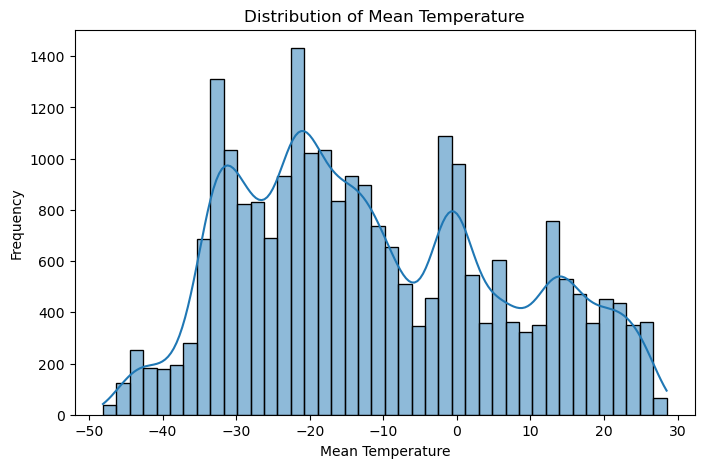

In [33]:
# Temperature Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['tmp'], kde=True)
plt.title("Distribution of Mean Temperature")
plt.xlabel("Mean Temperature")
plt.ylabel("Frequency")
plt.show()

In [ ]:
Temperature appears approximately normally distributed. 
No extreme skewness after outlier treatment.

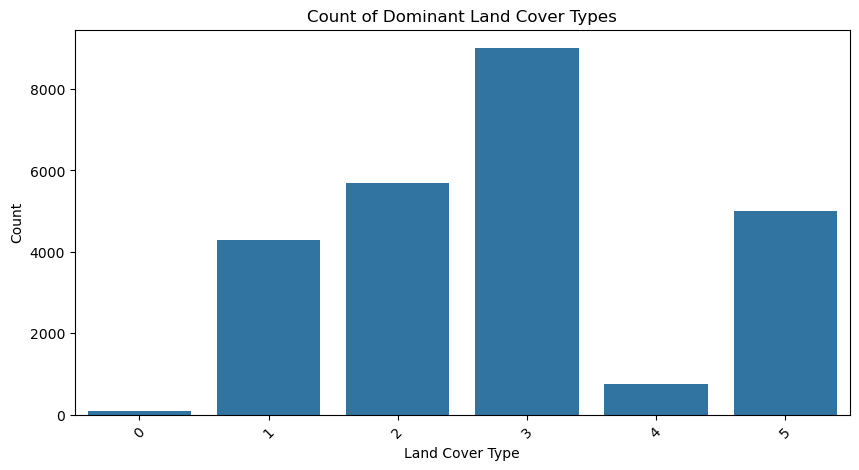

In [35]:
#Dominant land cover distribution
plt.figure(figsize=(10,5))
sns.countplot(x='dominant_land_cover', data=df)
plt.title("Count of Dominant Land Cover Types")
plt.xlabel("Land Cover Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
Some land cover types dominate the dataset.
Uneven distribution across categories.

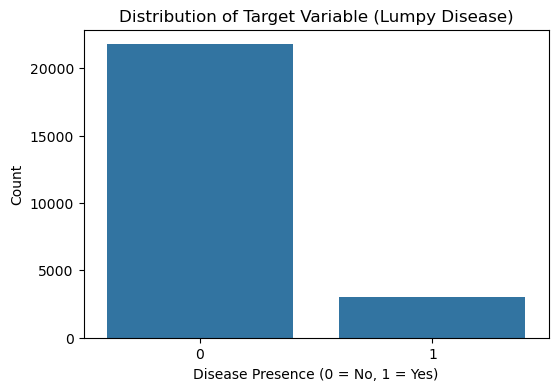

In [37]:
# CLASS IMBALANCE visualization
plt.figure(figsize=(6,4))
sns.countplot(x='lumpy', data=df)
plt.title("Distribution of Target Variable (Lumpy Disease)")
plt.xlabel("Disease Presence (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [ ]:
Majority class = No Disease.
Minority class = Disease cases (~12%).

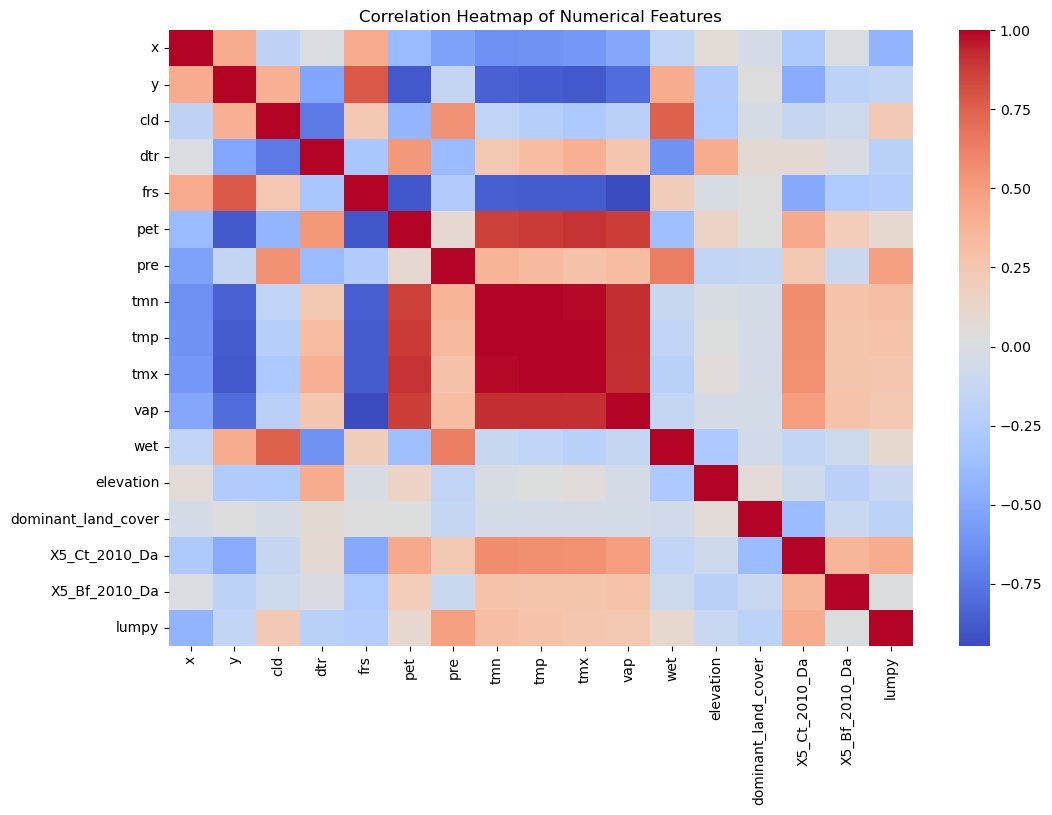

In [45]:
plt.figure(figsize=(12,8))
corr = df.corr()

sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
Strong correlation between:tmn, tmp, tmx
Possibly pre and wet
Multicollinearity detected.

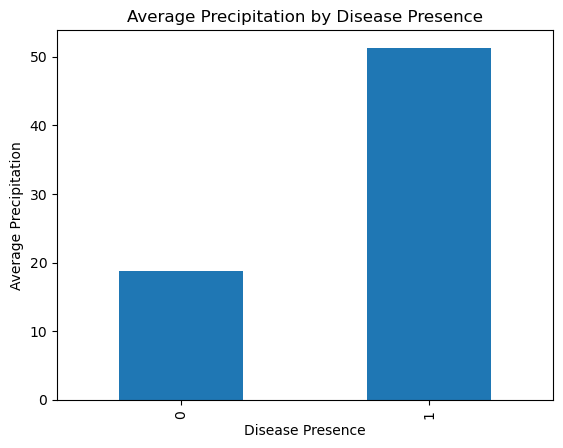

In [41]:
#Average precipitation  by disease class
grouped = df.groupby('lumpy')['pre'].mean()

grouped.plot(kind='bar')
plt.title("Average Precipitation by Disease Presence")
plt.xlabel("Disease Presence")
plt.ylabel("Average Precipitation")
plt.show()

# 4. Insights, Observations & Modeling Readiness

In [ ]:
#Key findings
Climate variables like temperature (tmn, tmp, tmx) show near-normal distributions after preprocessing.
Precipitation (pre) shows slight skewness but is well-behaved after outlier capping.
Dominant land cover distribution is uneven — some categories dominate the dataset.
The target variable (lumpy) is highly imbalanced (~12% positive cases).
#OBSERVATIONS
Disease-positive cases tend to have slightly higher average precipitation.
Temperature variables appear associated with disease presence.
Land cover type may influence disease spread.
Climate-related features show meaningful variation between disease classes.